## Костыра Екатерина ПМ_1901

# Занятие 11. Проект построения модели машинного обучения для регрессии

Веберите любые данные для задачи регрессии из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и постройте модель машинного обучения в соответствии с приведенной ниже схемой. Комментарии к каждому разделу обязательны.

Цель набора данных - диагностически предсказать, есть ли у пациента диабет, на основе определенных диагностических измерений, включенных в набор данных.

Наборы данных состоят из нескольких медицинских предикторов (независимых) и одной целевой (зависимой) переменной, результата . Независимые переменные включают количество беременностей у пациентки, их ИМТ, уровень инсулина, возраст и т. Д.

#### Информация об атрибутах:
1. preg - Количество беременных
2. plas - Глюкоза
3. pres - Кровяное давление (мм рт. Ст.)
4. skin - Толщина кожи (мм)
5. test - Инсулин
6. mass - Индекс массы тела (вес в кг / (рост в м) ^ 2)
7. pedi - Сахарный диабет
8. age - Возраст (лет)
9. class - Исход (Переменная класса (0, если не диабет, 1, если диабет) 268 из 768 равны 1, остальные равны 0)

In [4]:
import os
os.chdir("C:/Users/79811/anaconda3/")

### 1. Problem Definition, Loading the libraries and the dataset

In [5]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [6]:
# Load dataset
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

### 2. Analyze Data

#### Descriptive statistics

Посмотрим на размерность данных:

In [5]:
# shape
print(dataframe.shape)

(768, 9)


Получаем, что данные состоят из 768 строк и 9 столбцов

In [6]:
# types
print(dataframe.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [7]:
# head
print(dataframe.head(20))

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

Посмотрим на описательные статистики данных

In [8]:
# descriptions
set_option('precision', 1)
print(dataframe.describe())

        preg   plas   pres   skin   test   mass     pedi    age  class
count  768.0  768.0  768.0  768.0  768.0  768.0  7.7e+02  768.0  768.0
mean     3.8  120.9   69.1   20.5   79.8   32.0  4.7e-01   33.2    0.3
std      3.4   32.0   19.4   16.0  115.2    7.9  3.3e-01   11.8    0.5
min      0.0    0.0    0.0    0.0    0.0    0.0  7.8e-02   21.0    0.0
25%      1.0   99.0   62.0    0.0    0.0   27.3  2.4e-01   24.0    0.0
50%      3.0  117.0   72.0   23.0   30.5   32.0  3.7e-01   29.0    0.0
75%      6.0  140.2   80.0   32.0  127.2   36.6  6.3e-01   41.0    1.0
max     17.0  199.0  122.0   99.0  846.0   67.1  2.4e+00   81.0    1.0


Рассмотрим коэфициенты корреляции

In [9]:
# correlation
set_option('precision', 2)
print(dataframe.corr(method='pearson'))

       preg  plas  pres  skin  test  mass  pedi   age  class
preg   1.00  0.13  0.14 -0.08 -0.07  0.02 -0.03  0.54   0.22
plas   0.13  1.00  0.15  0.06  0.33  0.22  0.14  0.26   0.47
pres   0.14  0.15  1.00  0.21  0.09  0.28  0.04  0.24   0.07
skin  -0.08  0.06  0.21  1.00  0.44  0.39  0.18 -0.11   0.07
test  -0.07  0.33  0.09  0.44  1.00  0.20  0.19 -0.04   0.13
mass   0.02  0.22  0.28  0.39  0.20  1.00  0.14  0.04   0.29
pedi  -0.03  0.14  0.04  0.18  0.19  0.14  1.00  0.03   0.17
age    0.54  0.26  0.24 -0.11 -0.04  0.04  0.03  1.00   0.24
class  0.22  0.47  0.07  0.07  0.13  0.29  0.17  0.24   1.00


#### Data Visualizations

##### Unimodal Data Visualizations

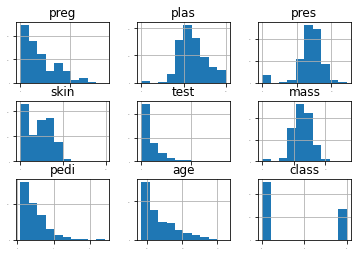

In [10]:
# histograms
dataframe.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

По результатам можно сказать, что признаки распределены ненормально

Рассмотрим оценку плотности ядра:

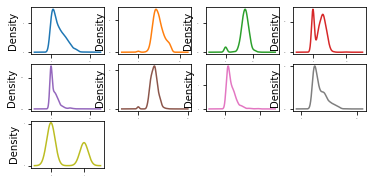

In [11]:
# density
dataframe.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
pyplot.show()

Также можно посмотреть на одном графике распределение трех признаков: массы, возраста и толщины кожи

<AxesSubplot:ylabel='Density'>

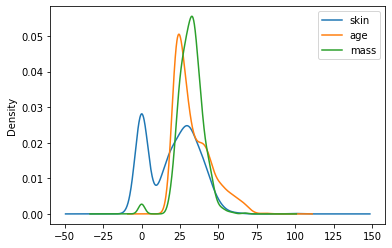

In [13]:
dataframe[['skin', 'age', 'mass']].plot.kde()  # Plot both columns

На графике видно, что плотность больше у mass

In [ ]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
pyplot.show()

##### Multimodal Data Visualizations

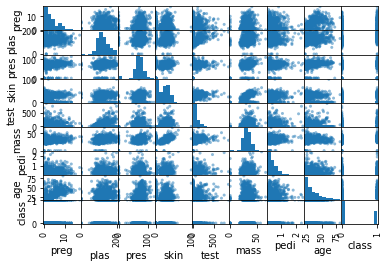

In [12]:
# scatter plot matrix
scatter_matrix(dataframe)
pyplot.show()

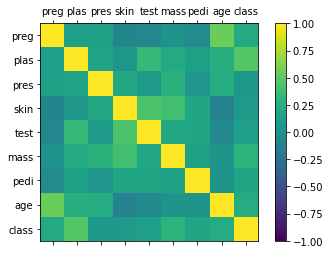

In [16]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

df.corr() вычисляет корреляционную матрицу , диапазон элементов которой равен [-1, 1], по умолчанию она использует коэффициент корреляции Пирсона. Это простой способ показать с помощью цветов, насколько сильны корреляции, какие переменные более коррелированы

### 3. Validation Dataset

Разделим наборы данных для проверки:

In [17]:
# Split-out validation dataset
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

### 4. Evaluate Algorithms: Baseline

Теперь проверим данные на выборочных алгоритмах (оценим алгоритмы):

In [18]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [19]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.164346 (0.014723)
LASSO: -0.182643 (0.009646)
EN: -0.175146 (0.010800)
KNN: -0.196506 (0.019203)
CART: -0.318958 (0.047690)
SVR: -0.178240 (0.025715)


По результатам видим:

Коэффициент линейной регрессии равен -0.16, а стандартное отклонение 0.01


Коэффициент регрессии лассо равен -0.18, а стандартное отклонение 0.01


Коэффициент эластичной регрессии равен -0.18, а стандартное отклонение 0.01


Коэффициент регрессии метода k-ближайших соседей равен -0.2, а стандартное отклонение 0.02


Коэффициент регрессии метода деревьев принятия решений равен -0.32, а стандартное отклонение 0.05


Коэффициент регрессии метода опорных векторов равен -0.18, а стандартное отклонение 0.03

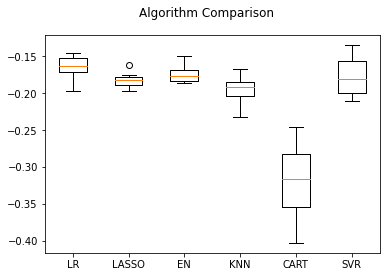

In [20]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Ящичковая диаграмма - это метод графического изображения групп числовых данных через их квартили. Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

По результатам видим, что лучше всего регрессия у метода SVR (Метод опорных векторов) и LR (линейная регрессия), а хуже всего регрессия метода CART

### 5. Evaluate Algorithms: Standardize Data

In [21]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.164346 (0.014723)
ScaledLASSO: -0.226132 (0.016689)
ScaledEN: -0.226132 (0.016689)
ScaledKNN: -0.186308 (0.029873)
ScaledCART: -0.315600 (0.055191)
ScaledSVR: -0.188240 (0.030850)


По результатам видим, что коэффициенты регрессий и стандартных отклонений отличаются по сравнению с предыдущим результатом, а именно:

Коэффициент линейной регрессии равен -0.16, а стандартное отклонение 0.01


Коэффициент регрессии лассо равен -0.23, а стандартное отклонение 0.02


Коэффициент эластичной регрессии равен -0.23, а стандартное отклонение 0.02


Коэффициент регрессии метода k-ближайших соседей равен -0.19, а стандартное отклонение 0.03


Коэффициент регрессии метода деревья принятия решений равен -0.32, а стандартное отклонение 0.06


Коэффициент регрессии метода опорных векторов равен -0.19, а стандартное отклонение 0.03

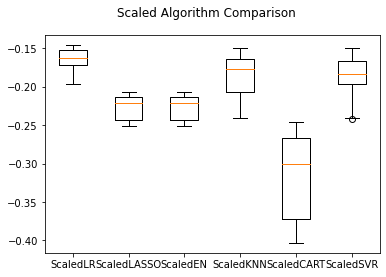

In [22]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

В этом случае лучше всего регрессия у метода KNN (Метод k-ближайших соседей) и LR (линейная регрессия), а хуже всего регрессия метода CART

### 6. Algorithm Tuning

In [23]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.173588 using {'n_neighbors': 21}
-0.306240 (0.028478) with: {'n_neighbors': 1}
-0.201266 (0.026613) with: {'n_neighbors': 3}
-0.186902 (0.027252) with: {'n_neighbors': 5}
-0.185562 (0.025937) with: {'n_neighbors': 7}
-0.180132 (0.022358) with: {'n_neighbors': 9}
-0.176710 (0.020981) with: {'n_neighbors': 11}
-0.178907 (0.019478) with: {'n_neighbors': 13}
-0.175272 (0.017739) with: {'n_neighbors': 15}
-0.174549 (0.017713) with: {'n_neighbors': 17}
-0.176334 (0.016720) with: {'n_neighbors': 19}
-0.173588 (0.016470) with: {'n_neighbors': 21}


### 7. Ensemble Methods

In [24]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -0.176750 (0.012568)
ScaledGBM: -0.168993 (0.024943)
ScaledRF: -0.189562 (0.027248)
ScaledET: -0.189632 (0.028215)


По результатам видим, что:

Коэффициент AdaBoostRegressor  равен -0.18, а стандартное отклонение 0.01


Коэффициент GradientBoostingRegresso равен -0.17, а стандартное отклонение 0.02


Коэффициент RandomForestRegressor равен -0.19, а стандартное отклонение 0.03


Коэффициент ExtraTreesRegressor равен -0.19, а стандартное отклонение 0.03

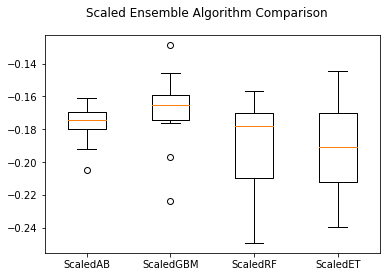

In [25]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [26]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [27]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.164204 using {'n_estimators': 50}
-0.164204 (0.020165) with: {'n_estimators': 50}
-0.169925 (0.025533) with: {'n_estimators': 100}
-0.172772 (0.025994) with: {'n_estimators': 150}
-0.178305 (0.025688) with: {'n_estimators': 200}
-0.182789 (0.025411) with: {'n_estimators': 250}
-0.187285 (0.024523) with: {'n_estimators': 300}
-0.189254 (0.024974) with: {'n_estimators': 350}
-0.191677 (0.025312) with: {'n_estimators': 400}


### 8. Finalize Model

In [28]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

In [29]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

0.1797187429265099


Среднее арифметическое (Mean) квадратов разностей между предсказанными и реальными значениями модели рано 0.18